In [1]:
from IPython.core.display import HTML; from IPython.display import Image, display; display(HTML("<style>.container { width:100% !important; }</style>"))
from matplotlib.pyplot import imshow; import numpy as np; from PIL import Image
import yaml
from fastai.core import Path
from image_handling import *
from file_maintenance import *
from image_graph import get_image_array
import config

**After the page image has been pre-processed, we need to review the tags and add any letters that were mistagged back to the letters to be tagged**   

- `all_components.yaml` contains all connected components found in the image graph (these are the characters found on the page)  
- `new_components.yaml` contains the connected components that the model could not classify at an 85% probability or higher

In [2]:
yaml_pth = Path('lgi_data/')
with open(yaml_pth/'all_components.yaml', 'rb') as f:
    components = yaml.load(f)
    
with open(yaml_pth/'new_components.yaml', 'rb') as f:
    new_components = yaml.load(f)

In [3]:
len(components), len(new_components)

(885, 132)

**Get the image array for the picture and set the global variables used by the helper scripts**

In [6]:
im_path = Path('./greek_pages/page_images')
pic_name = 'GK_RDR_PG2.jpeg'
imgarr = get_image_array(im_path/pic_name)

config.components = components
config.new_components = new_components
config.letter_dest = Path('lgi_data/new_data/')
config.img_arr = imgarr
config.rows, config.cols = config.img_arr.shape

**Helper function to show the surrounding word-context for each letter automatically tagged, a box is drawn around the tagged letter**

In [6]:
def show_component_context(i, mult=1):
    lb, ub, lbr, ubr = components[i]
    imcopy = imgarr.copy()
    draw_box(lb, ub, lbr, ubr, imcopy)
    lb, ub, lbr, ubr = get_bounds(i,context=mult)
    imshow(imcopy[lbr:ubr,lb:ub], cmap='gist_gray')

**After scanning through each `auto_tags/LETTER` folder, I quickly move incorrectly labeled images to the `mistags` folder, anything that I'm not certain about I review with the following process**

**For each image in the folder specified below, I look at the context and decide whether the image has been correctly labeled. This is helpful for smaller characters such as commas, periods and accents**

In [11]:
# review autotags! this should be more interactive 
auto_pth = Path('lgi_data/gk_letter_imgs/auto_tags/')
letterpth = auto_pth/'ρ'
indcs = iter(sorted([int(f.name.split('_')[2]) for f in letterpth.ls() if '.jp' in f.name]))

1699379


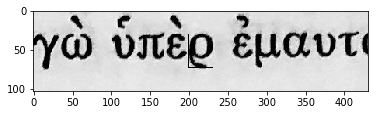

In [12]:
i = next(indcs)
print(i)
show_component_context(i,mult=1)

**After this process, all images in the auto_tag subfolders should be correct, and anything incorrectly labeled should be in `mistags`**  
**The following script goes through and moves any component in the mistag folder into `new_components` which contains all letters that need to be tagged**

In [7]:
new_comlen_pre = len(config.new_components)
get_mistags()
new_comlen_post = len(config.new_components)

In [8]:
print(new_comlen_pre, new_comlen_post)

132 138


**The updated `new_components` dictionary is stored in the correct yaml file**

In [9]:
with open(yaml_pth/'new_components.yaml', 'w') as f:
    yaml.dump(config.new_components, f)